In [1]:
import math
import random
import time
import matplotlib.pyplot as plt

In [2]:
class MaxHeap:
    """
    A max heap implementation for maintaining the highest-priority key at the root.
    Works with any data type that supports comparison operators.
    """
    def __init__(self):
        self.heap = []  # This list will be the heap

    def left(self, idx):
        """Return the index of the left child of the element at idx."""
        return idx * 2 + 1

    def right(self, idx):
        """Return the index of the right child of the element at idx."""
        return idx * 2 + 2

    def parent(self, idx):
        """Return the index of the parent node of the element at idx."""
        return (idx - 1) // 2

    def heappush(self, key):
        """
        Insert a key into the max heap and maintain the max-heap property.
        
        Parameters
        ----------
        key : object
            The object to insert into the heap. The object should support comparison operators.
        """
        self.heap.append(key)  # Add the new key to the end of the list
        self.heapify(len(self.heap) - 1)  # Call heapify on the last index to adjust

    def heappop(self):
        """
        Remove and return the key with the maximum priority (root) from the max heap.
        
        Returns
        -------
        key
            The key object with the highest priority in the heap.
        """
        if self.is_empty():
            return None

        self.swap(0, len(self.heap) - 1)  # Swap the root with the last element
        max_key = self.heap.pop()  # Remove and save the last element (original root)
        self.heapify(0)  # Call heapify on the root to adjust

        return max_key

    def heapify(self, index):
        """
        Adjust the element at the given index to maintain the max-heap property.
        
        Parameters
        ----------
        index : int
            The index of the element to adjust in the heap.
        """
        # Bubble up the element if needed
        while index > 0 and self.heap[index] > self.heap[self.parent(index)]:
            self.swap(index, self.parent(index))
            index = self.parent(index)

        # Sink down the element if needed
        while self.left(index) < len(self.heap):
            largest = self.left(index)
            right_index = self.right(index)

            # Choose the larger child
            if right_index < len(self.heap) and self.heap[right_index] > self.heap[largest]:
                largest = right_index

            # If the current element is larger than both children, we're done
            if self.heap[index] >= self.heap[largest]:
                break

            # Otherwise, swap with the larger child and continue
            self.swap(index, largest)
            index = largest

    def swap(self, a, b):
        """Swap elements at indices a and b in the heap."""
        self.heap[a], self.heap[b] = self.heap[b], self.heap[a]

    def is_empty(self):
        """Check if the heap is empty."""
        return len(self.heap) == 0

    def __str__(self):
        """Return a string representation of the heap."""
        return str(self.heap)

I designed the test cases to cover a range of scenarios. First are basic checks to test an empty heap to confirm it behaves as expected when there are no elements, and to verify that popping from an empty heap returns None.

When inserting multiple elements in random order, the heap always keeps the largest value at the top, as it should. The tests also include duplicate values to confirm that the heap can manage items with the same priority without any issues. For more complex cases, I inserted a variety of values and check that the heap removes them in descending order.

Finally, I tested with extreme values like positive and negative infinity to see if the heap can handle the full range of possible inputs. These test cases together ensure that the MaxHeap maintains the correct order, handles edge cases, and behaves predictably across different types of input.

In [3]:
# Test empty heap
heap = MaxHeap()
assert heap.is_empty() == True, "New heap should be empty"
assert len(heap.heap) == 0, "New heap should have length 0"
assert heap.heappop() == None, "Popping from empty heap should return None"

# Test single element operations
heap = MaxHeap()
heap.heappush(10)
assert len(heap.heap) == 1, "Heap should have length 1 after single push"
assert heap.heap[0] == 10, "First element should be 10"
assert heap.heappop() == 10, "Should pop 10"
assert heap.is_empty() == True, "Heap should be empty after popping single element"

# Test multiple elements with different values
heap = MaxHeap()
heap.heappush(5)
heap.heappush(15)
heap.heappush(10)

# Verify max heap property after insertions
assert heap.heap[0] == 15, "Highest value should be at root (15)"
assert heap.heap[0] >= heap.heap[1], "Root should have higher value than left child"
assert heap.heap[0] >= heap.heap[2], "Root should have higher value than right child"

# Test pop order for descending values
popped1 = heap.heappop()
popped2 = heap.heappop()
popped3 = heap.heappop()
assert popped1 >= popped2 >= popped3, "Values should pop in descending order"

# Test duplicate values
heap = MaxHeap()
heap.heappush(20)
heap.heappush(20)
heap.heappush(20)

assert len(heap.heap) == 3, "Heap should accept duplicate values"
popped1 = heap.heappop()
popped2 = heap.heappop()
popped3 = heap.heappop()
assert popped1 == popped2 == popped3 == 20, "All popped values should be 20"

# Test complex priority order with various integers
heap = MaxHeap()
values = [100, 20, 50, 70, 30, 80, 60]
for value in values:
    heap.heappush(value)

# Pop all values and ensure they come out in descending order
previous_value = float('inf')
while not heap.is_empty():
    value = heap.heappop()
    assert value <= previous_value, "Values should be popped in descending order"
    previous_value = value

# Test extreme values
heap = MaxHeap()
heap.heappush(float('inf'))  # Very high value
heap.heappush(0)             # Medium value
heap.heappush(float('-inf')) # Very low value

assert heap.heappop() == float('inf'), "Highest value (infinity) should be popped first"
assert heap.heappop() == 0, "Zero should be popped second"
assert heap.heappop() == float('-inf'), "Negative infinity should be popped last"

print("All tests passed!")


All tests passed!


In [4]:
import math

class Task:
    """
    Represents a task with priority attributes, dependencies, and scheduling constraints.
    
    Attributes
    ----------
    id : int
        Unique identifier for the task.
    description : str
        Brief description of the task.
    durationMins : int
        Duration of the task in minutes.
    dependencies : list
        List of task IDs that must be completed before this task.
    status : str
        Current status of the task (default is 'N' for not started).
    deadlineTimeConstraintMins : int, optional
        Time by which the task should ideally start, if applicable.
    dependentTasksCount : int
        Number of tasks that depend on this task.
    fixedStartTime : bool
        Indicates if the task has a fixed start time.
    priorityScore : float
        Calculated priority score of the task, considering time constraints and dependencies.
    """
    def __init__(self, id, description, durationMins, deadlineTimeConstraintMins, fixedStartTime=False, dependencies=[]):
        self.id = id
        self.description = description
        self.durationMins = durationMins
        self.dependencies = dependencies  # Tasks that must be completed before this task
        self.status = 'N'  # Not started by default
        self.deadlineTimeConstraintMins = deadlineTimeConstraintMins # Latest time to start (Setting this to the last hour of the day means I can start anytime)
        self.fixedStartTime = fixedStartTime  # Indicates if the task has a fixed start time
        self.dependentTasksCount = 0  # Number of tasks that depend on this task
        self.priorityScore = self.updatePriority()  # Calculate priority score

    def updatePriority(self, currentTimeMins=0):
        """
        Updates the task's priority score based on time constraints and dependencies.
        
        Parameters
        ----------
        currentTimeMins : int
            The current time in minutes, used to adjust priority based on proximity to the deadline.
        
        Returns
        -------
        float
            Updated priority score for the task.
        """
        # Assign fixed start time directly if applicable
        if self.fixedStartTime:
            self.priorityScore = - self.deadlineTimeConstraintMins
            return self.priorityScore

        # Calculate time-based priority adjustment
        timeFactor = 0
        if self.deadlineTimeConstraintMins:
            proximityFactor = max(0, self.deadlineTimeConstraintMins - currentTimeMins)
            timeFactor = 10 * math.exp(-proximityFactor / 1000)  # Exponential decay as deadline nears

        # Final priority score (higher values indicate higher priority)
        self.priorityScore = timeFactor + self.dependentTasksCount
        return self.priorityScore


    # I overrode the comparison operators to allow for comparisons based on priorityScore in the MaxHeap class.

    def __lt__(self, other):
        """Less-than comparison based on priorityScore for heap operations."""
        return self.priorityScore < other.priorityScore

    def __gt__(self, other):
        """Greater-than comparison based on priorityScore for heap operations."""
        return self.priorityScore > other.priorityScore

    def __le__(self, other):
        """Less-than-or-equal comparison based on priorityScore for heap operations."""
        return self.priorityScore <= other.priorityScore

    def __ge__(self, other):
        """Greater-than-or-equal comparison based on priorityScore for heap operations."""
        return self.priorityScore >= other.priorityScore

In [5]:
class TaskScheduler:
    """
    A Simple Daily Task Scheduler Using Priority Queues.
    Manages tasks based on their dependencies and priorities.
    """

    NOT_STARTED = 'N'
    IN_priorityQueue = 'I'
    COMPLETED = 'C'

    def __init__(self, tasks):
        """
        Initializes the TaskScheduler with a list of tasks.

        Parameters
        ----------
        tasks (list): A list of Task objects to be scheduled.
        """
        self.tasks = tasks
        self.priorityQueue = MaxHeap()  # Priority queue for tasks
        self.fixedTimePriorityQueue = MaxHeap()  # Priority queue for tasks
        self.dependentCounts = self.calculateDependentCounts()  # Store dependent task counts for each task
        self.applyDependentCounts()  # Set the dependent task counts in each task

    def calculateDependentCounts(self):
        """
        Calculates the number of tasks that depend on each task.

        Returns
        -------
        dict: A dictionary with task IDs as keys and the count of dependent tasks as values.
        """
        dependentCounts = {task.id: 0 for task in self.tasks}
        for task in self.tasks:
            for dependency in task.dependencies:
                if dependency in dependentCounts:
                    dependentCounts[dependency] += 1
        return dependentCounts

    def applyDependentCounts(self):
        """
        Sets the dependent task count for each task based on dependencies.
        """
        for task in self.tasks:
            task.dependentTasksCount = self.dependentCounts.get(task.id, 0)
            task.updatePriority()  # Update initial priority based on dependent count

    def removeDependency(self, taskID):
        """
        Removes a completed task from the dependency lists of other tasks
        and updates their priority scores if they become eligible.

        Parameters
        ----------
        taskID (int): The ID of the completed task.
        """
        for task in self.tasks:
            if taskID in task.dependencies:
                task.dependencies.remove(taskID)
                # If this task has no more dependencies, update its priority
                if not task.dependencies:
                    task.updatePriority(self.currentTimeMins)
                    if task.status == self.NOT_STARTED:
                        task.status = self.IN_priorityQueue
                        if task.fixedStartTime:
                            self.fixedTimePriorityQueue.heappush(task)
                        else:
                            self.priorityQueue.heappush(task)

    def getTasksReady(self):
        """
        Pushes tasks with no dependencies into the priority queue.
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED and not task.dependencies:
                task.status = self.IN_priorityQueue
                if task.fixedStartTime:
                    self.fixedTimePriorityQueue.heappush(task)
                else:
                    self.priorityQueue.heappush(task)

    def checkUnscheduledTasks(self):
        """
        Checks if there are any tasks that have not been started yet.

        Returns
        -------
        bool: True if there are tasks that have not been started, False otherwise.
        """
        return any(task.status == self.NOT_STARTED for task in self.tasks)

    def formatTime(self, time):
        """
        Formats the given time in minutes to a string in HH:MM format.

        Parameters 
        ----------
        time (int): Time in minutes.

        Returns
        -------
        str: Formatted time string in HH:MM format.
        """
        hours = time // 60
        minutes = time % 60
        return f"{hours:02d}:{minutes:02d}"

    def runTaskScheduler(self, startingTimeMins):
        """
        Runs the task scheduler starting from the given time.

        Parameters
        ----------
        startingTimeMins (int): The starting time in minutes from midnight.
        """
        self.currentTimeMins = startingTimeMins
        print("Running a simple scheduler:\n")
        while self.checkUnscheduledTasks() or not self.priorityQueue.is_empty() or not self.fixedTimePriorityQueue.is_empty():
            # Identify and push tasks ready to execute into the priority queue
            self.getTasksReady()

            if not self.priorityQueue.is_empty():
                if not self.fixedTimePriorityQueue.is_empty() and self.fixedTimePriorityQueue.heap[0].deadlineTimeConstraintMins - self.currentTimeMins <= self.priorityQueue.heap[0].durationMins:
                    task = self.fixedTimePriorityQueue.heappop()
                    self.currentTimeMins = max(self.currentTimeMins, task.deadlineTimeConstraintMins)
                else:
                    task = self.priorityQueue.heappop()

            elif not self.fixedTimePriorityQueue.is_empty():
                task = self.fixedTimePriorityQueue.heappop()
                self.currentTimeMins = max(self.currentTimeMins, task.deadlineTimeConstraintMins)

            else:
                break

            if task and task.status == self.IN_priorityQueue:
                print(f"🕰t={self.formatTime(self.currentTimeMins)}")
                print(f"\t Started '{task.description}' for {task.durationMins} mins...")
                self.currentTimeMins += task.durationMins
                print(f"\t✅ t={self.formatTime(self.currentTimeMins)}, task completed!")

                # Mark task as completed and remove it from dependencies
                task.status = self.COMPLETED
                self.removeDependency(task.id)
                task = None

        totalTimeMins = self.currentTimeMins - startingTimeMins
        print(f"\n🏁 Completed all planned tasks in {totalTimeMins//60} hours and {totalTimeMins%60:02d} mins!")


    ##########
    # I'm not sure if this okay, but I created a new run scheduler method that has a limit of 24 hours so 
    # that I can actually see how many tasks I can fit in one day and test the effeciency metrics
    # I named it run24HoursTaskScheduler()
    ##########

    def run24HoursTaskScheduler(self, startingTimeMins):
        """
        Runs the task scheduler starting from the given time.

        Parameters
        ----------
        startingTimeMins (int): The starting time in minutes from midnight.
        """
        self.currentTimeMins = startingTimeMins
        max_time = 1440  # 24 hours in minutes

        print("Running a simple scheduler:\n")
        while (self.checkUnscheduledTasks() or not self.priorityQueue.is_empty() or not self.fixedTimePriorityQueue.is_empty()) and self.currentTimeMins < max_time:
            # Identify and push tasks ready to execute into the priority queue
            self.getTasksReady()

            if not self.priorityQueue.is_empty():
                if not self.fixedTimePriorityQueue.is_empty() and self.fixedTimePriorityQueue.heap[0].deadlineTimeConstraintMins - self.currentTimeMins <= self.priorityQueue.heap[0].durationMins:
                    task = self.fixedTimePriorityQueue.heappop()
                    self.currentTimeMins = max(self.currentTimeMins, task.deadlineTimeConstraintMins)
                else:
                    task = self.priorityQueue.heappop()

            elif not self.fixedTimePriorityQueue.is_empty():
                task = self.fixedTimePriorityQueue.heappop()
                self.currentTimeMins = max(self.currentTimeMins, task.deadlineTimeConstraintMins)

            else:
                break

            if task and task.status == self.IN_priorityQueue:
                print(f"🕰t={self.formatTime(self.currentTimeMins)}")
                print(f"\t Started '{task.description}' for {task.durationMins} mins...")
                self.currentTimeMins += task.durationMins
                print(f"\t✅ t={self.formatTime(self.currentTimeMins)}, task completed!")

                # Mark task as completed and remove it from dependencies
                task.status = self.COMPLETED
                self.removeDependency(task.id)
                task = None

        # Print summary and end if 24 hours have passed
        if self.currentTimeMins >= max_time:
            print(f"\n⏰ 24-hour limit reached. Ending schedule.")
        else:
            totalTimeMins = self.currentTimeMins - startingTimeMins
            print(f"\n🏁 Completed all planned tasks in {totalTimeMins//60} hours and {totalTimeMins%60:02d} mins!")


In [6]:
startTimeMins = 6*60 # 6:00 AM (when I wake up)

tasks = [
    Task(id=1, description="Wake up and get ready", durationMins=20, deadlineTimeConstraintMins=startTimeMins + 10),  # 06:10
    Task(id=2, description="Breakfast", durationMins=30, deadlineTimeConstraintMins=startTimeMins + 30, dependencies=[1]),  # 06:30
    Task(id=3, description="Go for a 45 mins run", durationMins=45, deadlineTimeConstraintMins=startTimeMins + 60, dependencies=[1, 2]),  # 07:00
    Task(id=4, description="Shower", durationMins=15, deadlineTimeConstraintMins=startTimeMins + 105, dependencies=[1, 3]),  # 07:45
    Task(id=5, description="Attend SS110", durationMins=90, deadlineTimeConstraintMins=startTimeMins + 120, dependencies=[1, 4], fixedStartTime=True),  # 08:00
    Task(id=6, description="Work on my personal project at NTU Main Library", durationMins=240, deadlineTimeConstraintMins=startTimeMins + 660),  # 17:00
    Task(id=7, description="Read 20 pages", durationMins=30, deadlineTimeConstraintMins=startTimeMins + 990, dependencies=[1, 6]),  # 22:30
    Task(id=8, description="Lunch", durationMins=30, deadlineTimeConstraintMins=startTimeMins + 480, dependencies=[1, 5]),  # 14:00
    Task(id=9, description="Work Study", durationMins=30, deadlineTimeConstraintMins=startTimeMins + 840, dependencies=[1]),  # 20:00
    Task(id=10, description="Bike with friends through streets we didn’t visit", durationMins=60, deadlineTimeConstraintMins=startTimeMins + 780, dependencies=[1, 6, 8])  # 19:00
]

# Initialize and run the scheduler with a starting time
scheduler = TaskScheduler(tasks)
scheduler.runTaskScheduler(startTimeMins)


Running a simple scheduler:

🕰t=06:00
	 Started 'Wake up and get ready' for 20 mins...
	✅ t=06:20, task completed!
🕰t=06:20
	 Started 'Breakfast' for 30 mins...
	✅ t=06:50, task completed!
🕰t=06:50
	 Started 'Go for a 45 mins run' for 45 mins...
	✅ t=07:35, task completed!
🕰t=07:35
	 Started 'Shower' for 15 mins...
	✅ t=07:50, task completed!
🕰t=08:00
	 Started 'Attend SS110' for 90 mins...
	✅ t=09:30, task completed!
🕰t=09:30
	 Started 'Lunch' for 30 mins...
	✅ t=10:00, task completed!
🕰t=10:00
	 Started 'Work on my personal project at NTU Main Library' for 240 mins...
	✅ t=14:00, task completed!
🕰t=14:00
	 Started 'Bike with friends through streets we didn’t visit' for 60 mins...
	✅ t=15:00, task completed!
🕰t=15:00
	 Started 'Read 20 pages' for 30 mins...
	✅ t=15:30, task completed!
🕰t=15:30
	 Started 'Work Study' for 30 mins...
	✅ t=16:00, task completed!

🏁 Completed all planned tasks in 10 hours and 00 mins!


In [7]:
# Test with original order
task1 = Task(1, "Complete Assignment", durationMins=60, deadlineTimeConstraintMins=300)  
task2 = Task(2, "Prepare Presentation", durationMins=30, deadlineTimeConstraintMins=180) 
task3 = Task(3, "Workout", durationMins=45, deadlineTimeConstraintMins=360) 
task4 = Task(4, "Read Book", durationMins=20, deadlineTimeConstraintMins=240) 

tasks_original = [task1, task2, task3, task4]
scheduler1 = TaskScheduler(tasks_original)
original_order = []
while scheduler1.checkUnscheduledTasks() or not scheduler1.priorityQueue.is_empty():
    scheduler1.getTasksReady()
    task = scheduler1.priorityQueue.heappop()
    original_order.append(task.id)
print("\n--- Done With Original Order ---")


# Test with shuffled order
task1 = Task(1, "Complete Assignment", durationMins=60, deadlineTimeConstraintMins=300)  
task2 = Task(2, "Prepare Presentation", durationMins=30, deadlineTimeConstraintMins=180) 
task3 = Task(3, "Workout", durationMins=45, deadlineTimeConstraintMins=360) 
task4 = Task(4, "Read Book", durationMins=20, deadlineTimeConstraintMins=240) 

tasks_shuffled = [task3, task1, task4, task2]  
scheduler2 = TaskScheduler(tasks_shuffled)
shuffled_order = []
print("\n--- Done With Shuffled Order ---")
while scheduler2.checkUnscheduledTasks() or not scheduler2.priorityQueue.is_empty():
    scheduler2.getTasksReady()
    task = scheduler2.priorityQueue.heappop()
    shuffled_order.append(task.id)


assert original_order == shuffled_order, "Order shouldn't change with shuffled tasks"
print("Order of tasks is maintained in the scheduler!")


--- Done With Original Order ---

--- Done With Shuffled Order ---
Order of tasks is maintained in the scheduler!


In [8]:
##########
# I'm not sure if this okay, but I created a new run scheduler method that has a limit of 24 hours so 
# that I can actually see how many tasks I can fit in one day
# I named it run24HoursTaskScheduler()
##########

def calculate_efficiency_metrics(tasks, startingTimeMins=0):
    """
    Runs the scheduler and calculates efficiency metrics: Task Completion Rate, Time Utilization, and Total Utility.

    Parameters:
    tasks (list): List of Task objects to be scheduled.
    startingTimeMins (int): Start time of the scheduler in minutes from midnight.

    Returns:
    dict: Dictionary containing Task Completion Rate, Time Utilization, and Total Utility.
    """
    # Run the scheduler
    scheduler = TaskScheduler(tasks)
    scheduler.run24HoursTaskScheduler(startingTimeMins)
    
    # Metric 1: Task Completion Rate
    total_tasks = len(tasks)
    completed_tasks = sum(1 for task in tasks if task.status == TaskScheduler.COMPLETED)
    task_completion_rate = completed_tasks / total_tasks
    
    # Metric 2: Time Utilization
    total_time_spent = scheduler.currentTimeMins - startingTimeMins  # Total scheduling period
    productive_time = sum(task.durationMins for task in tasks if task.status == "C" ) #check for tasks that are marked as completed
    time_utilization = productive_time / total_time_spent if total_time_spent > 0 else 0
    
    # Metric 3: Total Utility (adding up the priority scores of completed tasks- the fixed tasks have negative priority scores so I add the negative of that negative)
    total_utility = sum(task.priorityScore for task in tasks if (task.status == TaskScheduler.COMPLETED and not task.fixedStartTime)) + sum(-task.priorityScore for task in tasks if task.fixedStartTime)
    missed_utility = sum(task.priorityScore for task in tasks if task.status != TaskScheduler.COMPLETED) + sum(-task.priorityScore for task in tasks if task.fixedStartTime and task.status != TaskScheduler.COMPLETED)
    net_utility = total_utility - missed_utility
    
    return {
        "Task Completion Rate": task_completion_rate,
        "Time Utilization": time_utilization,
        "Total Utility": net_utility,
    }

# Generate example tasks for testing
def generate_tasks(num_tasks):
    tasks = []
    for i in range(1, num_tasks + 1):
        duration = random.randint(10, 60)  # Random duration between 10 to 60 minutes
        deadline = random.randint(60, 1440)  # Deadline between 1 hour and 24 hours from start
        fixed_start = random.choice([True, False])
        dependencies = random.sample(range(1, i), k=min(3, i-1)) if i > 1 else []  # Up to 3 dependencies
        task = Task(
            id=i,
            description=f"Task {i}",
            durationMins=duration,
            deadlineTimeConstraintMins=deadline,
            fixedStartTime=fixed_start,
            dependencies=dependencies
        )
        tasks.append(task)
    return tasks


# I couldn't plot it for different input size because I didn't have time
tasks = generate_tasks(15)
metrics = calculate_efficiency_metrics(tasks, startingTimeMins=0)

print("Efficiency Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")


Running a simple scheduler:

🕰t=09:10
	 Started 'Task 1' for 50 mins...
	✅ t=10:00, task completed!
🕰t=10:00
	 Started 'Task 2' for 16 mins...
	✅ t=10:16, task completed!
🕰t=10:16
	 Started 'Task 3' for 26 mins...
	✅ t=10:42, task completed!
🕰t=10:42
	 Started 'Task 4' for 17 mins...
	✅ t=10:59, task completed!
🕰t=20:50
	 Started 'Task 5' for 45 mins...
	✅ t=21:35, task completed!
🕰t=21:35
	 Started 'Task 7' for 27 mins...
	✅ t=22:02, task completed!
🕰t=22:02
	 Started 'Task 6' for 56 mins...
	✅ t=22:58, task completed!
🕰t=22:58
	 Started 'Task 9' for 27 mins...
	✅ t=23:25, task completed!
🕰t=23:25
	 Started 'Task 11' for 52 mins...
	✅ t=24:17, task completed!

⏰ 24-hour limit reached. Ending schedule.
Efficiency Metrics:
Task Completion Rate: 0.60
Time Utilization: 0.22
Total Utility: 4642.89


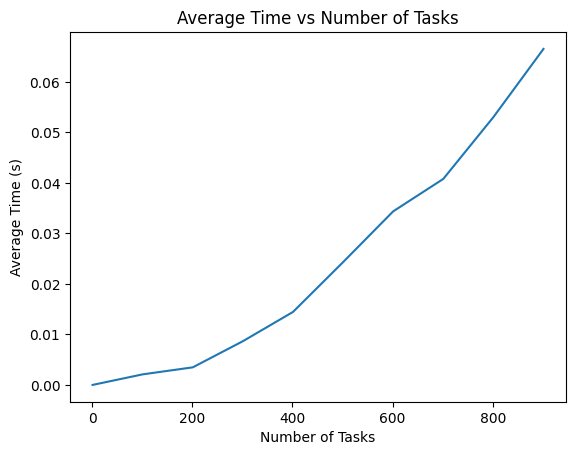

In [9]:
import sys # I imported sys to suppress the output of runTaskScheduler because when I try to print the code to add it to the file, the output is too long
import io

averageTimes = []
for num_tasks in range(1, 1000, 100): 
    averageTime = 0
    for _ in range(20):  
        tasks = generate_tasks(num_tasks)

        scheduler = TaskScheduler(tasks)

        # Suppress output of runTaskScheduler
        original_stdout = sys.stdout  # Save a reference to the original standard output
        sys.stdout = io.StringIO()    # Redirect stdout to an empty StringIO
        start = time.time()
        scheduler.runTaskScheduler(0)
        end = time.time()
        sys.stdout = original_stdout  # Reset stdout to original

        averageTime += end - start
    
    averageTimes.append(averageTime / 20)

xAxis = [i for i in range(1, 1000, 100)]
plt.plot(xAxis, averageTimes)
plt.xlabel('Number of Tasks')
plt.ylabel('Average Time (s)')
plt.title('Average Time vs Number of Tasks')
plt.show()